In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('./data/data1.csv')
df2 = pd.read_csv('./data/data2.csv')
df3 = pd.read_csv('./data/data3.csv')

df4 = pd.read_csv('./data/data4.csv')



Min J-D: -0.49
Max J-D: 1.17


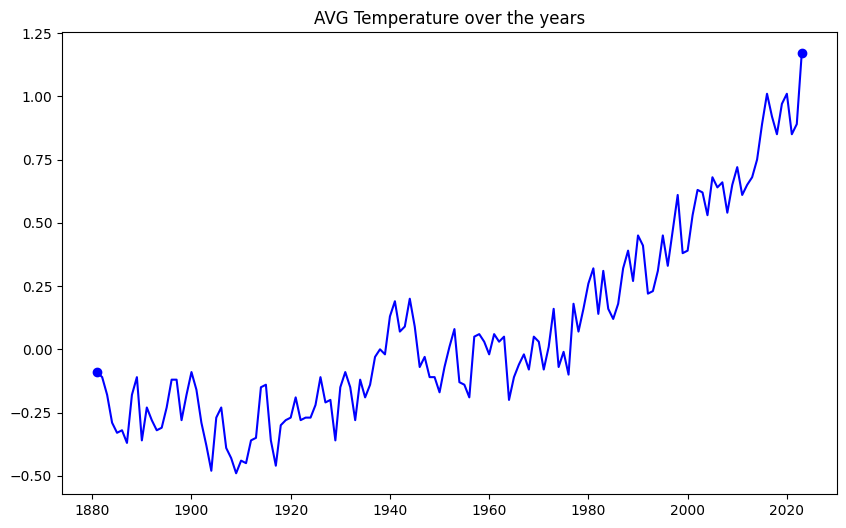

In [51]:
import matplotlib.pyplot as plt

min_jd = df1['J-D'].min()
max_jd = df1['J-D'].max()

print('Min J-D:', min_jd)
print('Max J-D:', max_jd)

plt.figure(figsize=(10, 6))
plt.plot(df1['Year'], df1['J-D'], color='blue')

# Add markers for the first and last points
plt.plot(df1['Year'].iloc[0], df1['J-D'].iloc[0], 'bo')  # First point
plt.plot(df1['Year'].iloc[-1], df1['J-D'].iloc[-1], 'bo')  # Last point

plt.title('AVG Temperature over the years')

plt.show()

### Con el dataset que se tenía se realizó una gráfica que muestra la temperatura promedio durante el año de los años 1881 hasta 2023. Esto para mostrarle al usuario si nos enfrentamos a más calor o más frío por año. Como parte de su optimización, se quitaron las labels y los puntos (idénticos a donde comienza y donde termina la gráfica) para cada dato. Las labels no son necesarias pues el título se explica solo y los puntos causaban ruido en la imagen.

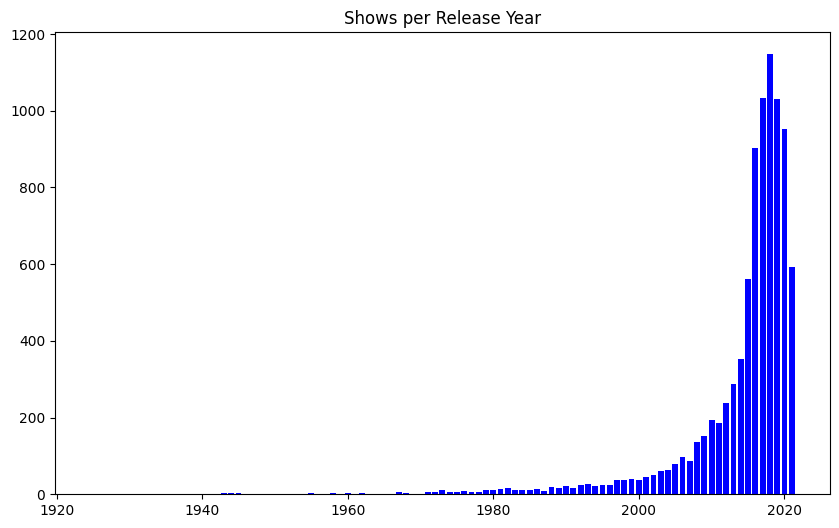

In [52]:
shows_per_year = df2.groupby('release_year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.bar(shows_per_year['release_year'], shows_per_year['count'], color='blue')

plt.title('Shows per Release Year')

plt.show()

### Con el dataset dado se buscó mostrar si con los años se crean más shows/peliculas. La gráfica va desde 1925 hasta 2021. Al ser datos cuantitativos por año, se eligió una gráfica de barras. Como parte de su optimización se buscaron opciones para eliminar los titulos por eje y agrupar las cantidades en vez de mostrar cada una (es decir, no mostrar 200, 201, 210, 355, 301, 400 sino 200 y luego 400).

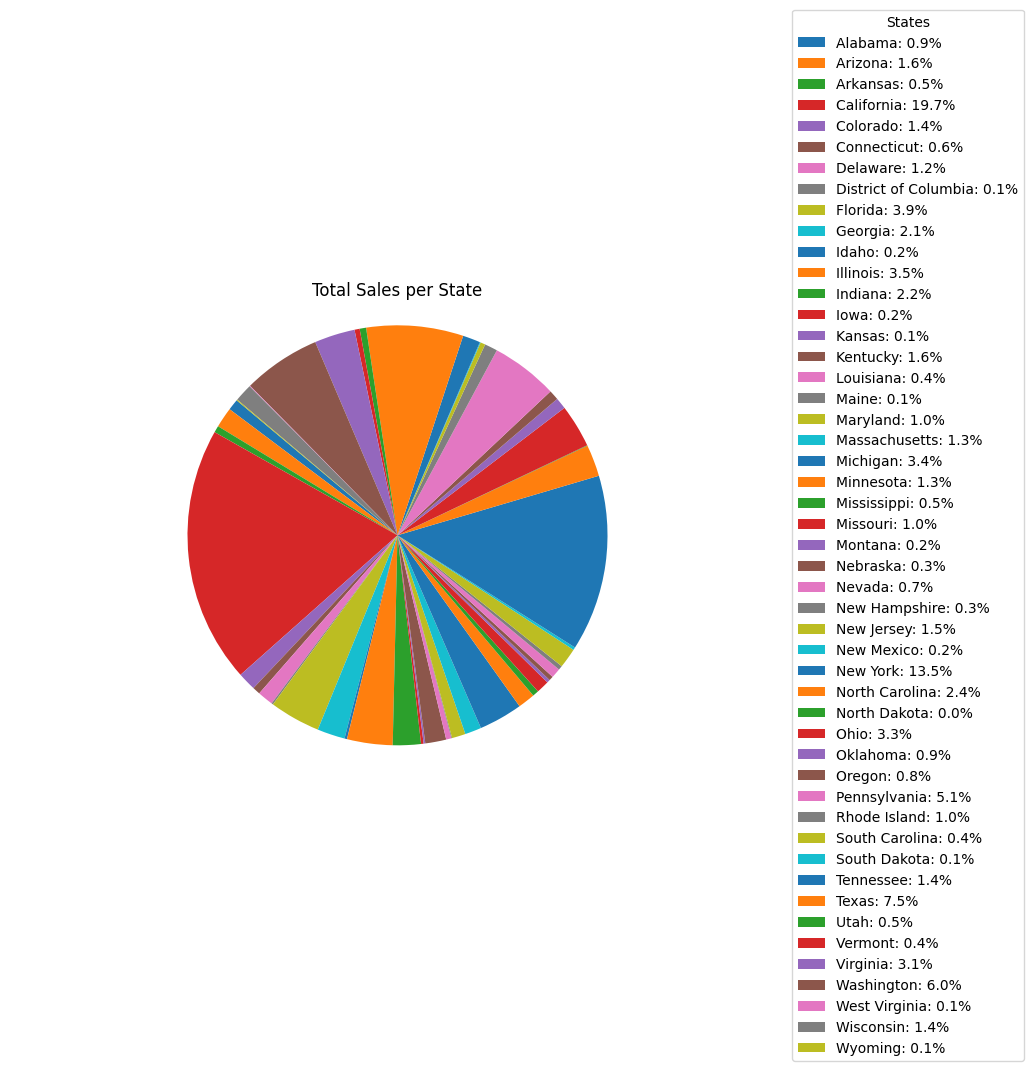

In [53]:
total_sales_per_state = df3.groupby('State')['Sales'].sum().reset_index()
total_sales_per_state.columns = ['State', 'Total Sales']

total_sales = total_sales_per_state['Total Sales'].sum()
total_sales_per_state['Percentage'] = (total_sales_per_state['Total Sales'] / total_sales) * 100

# Create the pie chart
plt.figure(figsize=(10, 6))
wedges, texts = plt.pie(total_sales_per_state['Total Sales'], startangle=140)

plt.title('Total Sales per State')
plt.axis('equal')

legend_labels = [f"{state}: {percentage:.1f}%" for state, percentage in zip(total_sales_per_state['State'], total_sales_per_state['Percentage'])]

plt.legend(wedges, legend_labels, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

### Con el dataset dado se busca mostrar qué estado de Estados Unidos realiza más compras. Se eligió una gráfica de Pie pues se pueden visualizar mejor a los estados que lideran las estadísticas. Como parte de las optimizaciones, se removieron todos los textos de la gráfica y se realizó una lista al lateral de esta. Así es más fácil ubicar los estados y cuánto aportan. La gráfica en sí es para comprobar que existe una diferencia notable ante los otros estados o no.

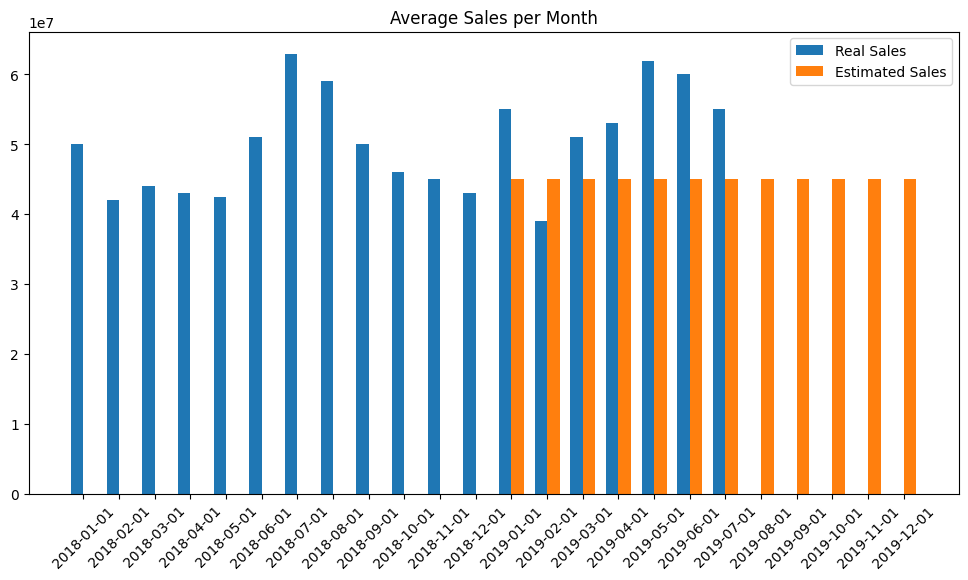

In [61]:
df4['Fecha'] = pd.to_datetime(df4['Fecha'], format='%b-%y')

df4['Ventas Reales (unidades)'] = df4['Ventas Reales (unidades)'].fillna(0)
df4['Ventas planificadas (unidades)'] = df4['Ventas planificadas (unidades)'].fillna(0)

# Create the double bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df4))

plt.bar(index, df4['Ventas Reales (unidades)'], bar_width, label='Real Sales')
plt.bar([i + bar_width for i in index], df4['Ventas planificadas (unidades)'], bar_width, label='Estimated Sales')

plt.title('Average Sales per Month')
plt.xticks([i + bar_width / 2 for i in index], df4['Fecha'].astype(str), rotation=45)
plt.legend()

plt.show()

### Retroalimentación 

Simplificar el diseño eliminando elementos y usando el espacio eficientemente es importante a la hora de realizar gráficas. Que sean claras y rápidas de entender es importante a la hora de presentar, pues no se puede perder tiempo explicando cada detalle. Es mejor que estas sean concisas y al punto.
